In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import normalize

Run this line and select both data files (ENB2012_data.xlsx and Qualitative_Bankruptcy.data.txt)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ENB2012_data.xlsx to ENB2012_data.xlsx
Saving Qualitative_Bankruptcy.data.txt to Qualitative_Bankruptcy.data.txt


In [ ]:
#1. Linear Regression on Dataset 1

df = pd.read_excel("ENB2012_data.xlsx")

'''
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load
'''

X = df.iloc[:,0:8]
X=(X-np.mean(X))/np.std(X)
y=df.iloc[:,8:10]




No missing values

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df[ df.eq("").any(1) | df.eq("?").any(1)]

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


Basic Statistics

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
def mini_batchSGD(grad_fn,x,y,lr,s,batch_size, epsilon=1e-4, max_iters=5):
  
  w=np.zeros(x.shape[1])
  grad=np.inf
  t=1
  record=[[],[]]
  y=np.array(y)
  while np.linalg.norm(grad)>epsilon and t<max_iters:
    #Create a mini-batch
    r=random.sample(range(x.shape[0]), batch_size)
    x_batch=x[[r]]
    y_batch=y[[r]]
    record[0].append(t)
    



    #Compute mini-batch stochastic gradient descent
    grad=grad_fn(w,x_batch,y_batch,batch_size)
    #Compute new weights

    w=w-lr*grad
    #Loss function
    if isinstance(s,LinearRegression):
      record[1].append(.5*np.mean(((x @ w)-y)**2))
    else:
      z = np.dot(x, w)
      J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
      record[1].append(cost_fn(x,y,w))
    t+=1
  return [w,record]
  



In [ ]:
class LinearRegression:
  #lr with lower case letters will stand for learning rate
  #LR with capital letters are what we use to initialize this Linear Regression class
    def __init__(self, add_bias=True,sgd=False,lr=0.0005,batch_size=10,max_iters=1000):
        self.add_bias = add_bias
        self.sgd=sgd
        if sgd:
          self.lr=lr
          self.batch_size=batch_size
          self.max_iters=max_iters
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        
        #Implementing mini-battch stochastic gradient descent
        if self.sgd:
          # define the gradient function
          def gradient(w, x, y,bs):
              yh =  x @ w 
              grad = .5*np.dot(yh - y, x)/bs
              return grad
          SGD=mini_batchSGD(gradient,x,y,lr=self.lr,s=self,batch_size=self.batch_size,max_iters=self.max_iters)
          self.record=SGD[1]
          self.w=SGD[0]
          

        else:
          #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
          self.w = np.linalg.lstsq(x, y)[0]
                    #return w for the least square difference
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(x.shape[0])])
        yh = x@self.w                             #predict the y values
        return yh

In [ ]:
#Loading in Dataset 2
n=["IR","MR","FF","Cred","Comp","OR","Class"]
df2 = pd.read_csv('Qualitative_Bankruptcy.data.txt', sep=",", header=None, names=n)
d=df2.replace(to_replace=["P","N","A","B","NB"],value=[1,0,0.5,1,0])


xTwo = d.iloc[:,0:2]

yTwo=d.iloc[:,6:8]
print(xTwo)
print(yTwo)


      IR   MR
0    1.0  1.0
1    0.0  0.0
2    0.5  0.5
3    1.0  1.0
4    0.0  0.0
..   ...  ...
245  0.0  0.0
246  1.0  0.0
247  0.5  0.0
248  0.0  0.0
249  1.0  0.0

[250 rows x 2 columns]
     Class
0        0
1        0
2        0
3        0
4        0
..     ...
245      1
246      1
247      1
248      1
249      1

[250 rows x 1 columns]


In [ ]:
d.isna().sum().sum()

0

In [ ]:
d[ d.eq("").any(1) | d.eq("?").any(1)]

,IR,MR,FF,Cred,Comp,OR,Class


In [ ]:
d.describe()

,IR,MR,FF,Cred,Comp,OR,Class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.482000,0.386000,0.376000,0.470000,0.476000,0.430000,0.428000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
75%,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'logistic function')

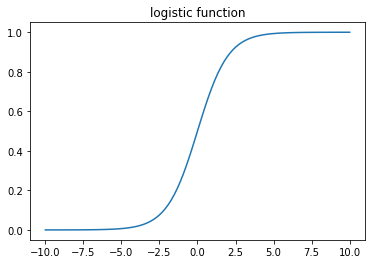

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function
z = np.linspace(-10,10,100)
plt.plot(z, logistic(z))
plt.title('logistic function')

In [ ]:
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad  

In [ ]:
class LogisticRegression:
    
    def __init__(self, add_bias=True, sgd=False,batch_size=16,learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.sgd=sgd
        self.batch_size=batch_size
    
    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))    # predictions  size N
        grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
        return grad 
        
        
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent

        if self.sgd:
          def gradient(w, x, y,bs):
            
            yh = logistic(np.dot(x,w))    # predictions  size N
            grad = np.dot(x.T, yh - y)/bs       # divide by N because cost is mean over N points
            return grad 
          SGD=mini_batchSGD(gradient,x,y,lr=self.learning_rate,s=self,batch_size=self.batch_size,max_iters=self.max_iters)
          self.record=SGD[1]
          self.w=SGD[0]
        
        else:

          while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
              g = self.gradient(x, y)
              self.w = self.w - self.learning_rate * g 
              t += 1
          
          if self.verbose:
              print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
              print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y["Y1"], random_state = 104, test_size = 0.20, shuffle = True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y["Y2"], random_state = 104, test_size = 0.20, shuffle = True)

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(xTwo, yTwo["Class"], random_state = 104, test_size = 0.20, shuffle = True)

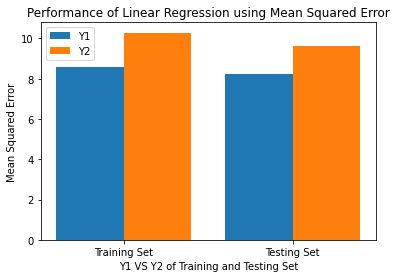

In [ ]:
#Experiment 1 and 2 (Task 3)

#Training set at 80%
#Linear Regression Performance on Training Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)
y1training_weights = LR.w
MSE_y1_train_an=np.mean((y1_predictions-y1_train)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_train)
y2training_weights = LR.w
MSE_y2_train_an=np.mean((y2_predictions-y2_train)**2)

#Linear Regression Performance on Testing Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
y1testing_weights = LR.w
MSE_y1_test_an=np.mean((y1_predictions-y1_test)**2)
r2_y1=1-(np.sum(y1_test-y1_predictions)**2 / (y1_test-np.mean(y1_test))**2)
#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
y2testing_weights = LR.w
MSE_y2_test_an=np.mean((y2_predictions-y2_test)**2)
r2_y2=1-(np.sum(y2_test-y2_predictions)**2 / (y2_test-np.mean(y2_test))**2)

#Performance of linear regression using Mean Squared Error
X_axis = ['Training Set','Testing Set']
MSEY1 = [MSE_y1_train_an,MSE_y1_test_an]
MSEY2 = [MSE_y2_train_an,MSE_y2_test_an]
  
X_axis = np.arange(len(X_axis))
  
plt.bar(X_axis - 0.2, MSEY1, 0.4, label = 'Y1')
plt.bar(X_axis + 0.2, MSEY2, 0.4, label = 'Y2')

X_axis = ['Training Set','Testing Set']

plt.xticks([0,1], X_axis)
plt.xlabel("Y1 VS Y2 of Training and Testing Set")
plt.ylabel("Mean Squared Error")
plt.title("Performance of Linear Regression using Mean Squared Error")
plt.legend()
plt.show()

In [ ]:
print(r2_y1,r2_y2)


118    -0.772910
153   -11.297942
175    -0.488569
522    -5.406425
737     0.467458
         ...    
533     0.074838
445   -30.080574
2      -3.342917
365    -0.993624
84     -0.773185
Name: Y1, Length: 154, dtype: float64 118    -1.846107
153    -5.307184
175    -1.315416
522   -12.918844
737    -0.523755
         ...    
533    -0.882551
445   -10.044967
2     -24.547368
365    -2.155165
84     -1.328487
Name: Y2, Length: 154, dtype: float64


In [ ]:
#Weights using Linear Regression fitting Y1

y1testw = y1testing_weights

y1testw

array([-6.98414616e+00,  2.59477360e+12, -1.28511561e+12, -2.66092821e+12,
        7.07739258e+00, -7.30113983e-02,  2.62190247e+00,  3.02919388e-01,
        2.22895489e+01])

In [ ]:
#Weights using Linear Regression fitting Y2

y2testw = y2testing_weights

y2testw

array([-7.52303922e+00, -1.09154760e+13,  5.40611654e+12,  1.11937696e+13,
        7.45312500e+00,  7.32116699e-02,  1.92126465e+00,  4.73365784e-02,
        2.46046219e+01])

terminated after 2343 iterations, with norm of the gradient equal to 9.993279124456223e-05
the weight found: [-0.67625228 -2.00183526  0.84391953]
terminated after 2343 iterations, with norm of the gradient equal to 9.993279124456223e-05
the weight found: [-0.67625228 -2.00183526  0.84391953]
terminated after 2343 iterations, with norm of the gradient equal to 9.993279124456223e-05
the weight found: [-0.67625228 -2.00183526  0.84391953]


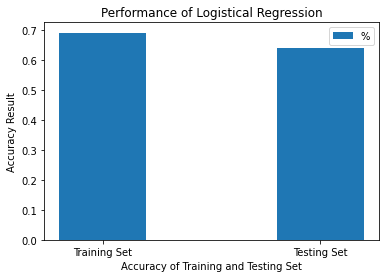

In [ ]:
# Task 1 and 2 -> Dataset 2

xTrain, xTest, yTrain, yTest = train_test_split(xTwo, yTwo["Class"], random_state = 104, test_size = 0.2, shuffle = True)


# Logistic Regression Performance on Training Set
#Y 
LRG = LogisticRegression(verbose=True)
model=LRG.fit(xTrain, yTrain)
yPredictions = LRG.fit(xTrain, yTrain).predict(xTrain)
yTrainingWeights= LRG.w


results=[]

for i in yPredictions:
  if i <0.5:
    results.append(0)
  
  else:
    results.append(1)

yTrain.to_numpy
count= np.count_nonzero(np.array(results)==(yTrain))
accuracyTrain = count/len(results)



xTrain, xTest, yTrain, yTest = train_test_split(xTwo, yTwo["Class"], random_state = 104, test_size = 0.2, shuffle = True)

  


# Logistic Regression Performance on Test Set
#Y 

LRG = LogisticRegression(verbose=True)
yPredictions = LRG.fit(xTrain, yTrain).predict(xTest)

yTrainingWeights2= LRG.w




results=[]

for i in yPredictions:
  if i <0.5:
    results.append(0)
  
  else:
    results.append(1)

yTrain.to_numpy
a = np.count_nonzero(np.array(results)==(yTest))
accuracyTest= a/len(results)


#Performance of logistic regression 
X_axis = ['Train Accuracy','Test Accuracy']
cost = [accuracyTrain,accuracyTest]

X_axis = np.arange(len(X_axis))
  
plt.bar(X_axis - 0.2, cost, 0.4, label = '%')


X_axis = ['Training Set','Testing Set']

plt.xticks([-0.2,0.8], X_axis)
plt.xlabel("Accuracy of Training and Testing Set")
plt.ylabel("Accuracy Result")
plt.title("Performance of Logistical Regression")
plt.legend()
plt.show()






In [ ]:
#Experiment 3 (Task 3)
#Training set at 20%
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y["Y1"], random_state = 104, test_size = 0.80, shuffle = True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y["Y2"], random_state = 104, test_size = 0.80, shuffle = True)

#Linear Regression Performance on Training Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)
MSE_y1_train_an20=np.mean((y1_predictions-y1_train)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_train)
MSE_y2_train_an20=np.mean((y2_predictions-y2_train)**2)

#Linear Regression Performance on Testing Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_test_an20=np.mean((y1_predictions-y1_test)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_test_an20=np.mean((y2_predictions-y2_test)**2)

In [ ]:
#Training set at 30%
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y["Y1"], random_state = 104, test_size = 0.70, shuffle = True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y["Y2"], random_state = 104, test_size = 0.70, shuffle = True)

#Linear Regression Performance on Training Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)
MSE_y1_train_an30=np.mean((y1_predictions-y1_train)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_train)
MSE_y2_train_an30=np.mean((y2_predictions-y2_train)**2)

#Linear Regression Performance on Testing Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_test_an30=np.mean((y1_predictions-y1_test)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_test_an30=np.mean((y2_predictions-y2_test)**2)

In [ ]:
#Training set at 40%
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y["Y1"], random_state = 104, test_size = 0.60, shuffle = True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y["Y2"], random_state = 104, test_size = 0.60, shuffle = True)

#Linear Regression Performance on Training Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)
MSE_y1_train_an40=np.mean((y1_predictions-y1_train)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_train)
MSE_y2_train_an40=np.mean((y2_predictions-y2_train)**2)

#Linear Regression Performance on Testing Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_test_an40=np.mean((y1_predictions-y1_test)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_test_an40=np.mean((y2_predictions-y2_test)**2)

In [ ]:
#Training set at 50%
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y["Y1"], random_state = 104, test_size = 0.50, shuffle = True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y["Y2"], random_state = 104, test_size = 0.50, shuffle = True)

#Linear Regression Performance on Training Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)
MSE_y1_train_an50=np.mean((y1_predictions-y1_train)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_train)
MSE_y2_train_an50=np.mean((y2_predictions-y2_train)**2)

#Linear Regression Performance on Testing Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_test_an50=np.mean((y1_predictions-y1_test)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_test_an50=np.mean((y2_predictions-y2_test)**2)

In [ ]:
#Training set at 60%
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y["Y1"], random_state = 104, test_size = 0.40, shuffle = True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y["Y2"], random_state = 104, test_size = 0.40, shuffle = True)

#Linear Regression Performance on Training Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)
MSE_y1_train_an60=np.mean((y1_predictions-y1_train)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_train)
MSE_y2_train_an60=np.mean((y2_predictions-y2_train)**2)

#Linear Regression Performance on Testing Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_test_an60=np.mean((y1_predictions-y1_test)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_test_an60=np.mean((y2_predictions-y2_test)**2)

In [ ]:
#Training set at 70%
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y["Y1"], random_state = 104, test_size = 0.30, shuffle = True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y["Y2"], random_state = 104, test_size = 0.30, shuffle = True)

#Linear Regression Performance on Training Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)
MSE_y1_train_an70=np.mean((y1_predictions-y1_train)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_train)
MSE_y2_train_an70=np.mean((y2_predictions-y2_train)**2)

#Linear Regression Performance on Testing Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_test_an70=np.mean((y1_predictions-y1_test)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_test_an70=np.mean((y2_predictions-y2_test)**2)

In [ ]:
#Training set at 80%
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y["Y1"], random_state = 104, test_size = 0.20, shuffle = True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y["Y2"], random_state = 104, test_size = 0.20, shuffle = True)

#Linear Regression Performance on Training Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)
MSE_y1_train_an80=np.mean((y1_predictions-y1_train)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_train)
MSE_y2_train_an80=np.mean((y2_predictions-y2_train)**2)

#Linear Regression Performance on Testing Set
#Y1
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_test_an80=np.mean((y1_predictions-y1_test)**2)

#Y2
LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_test_an80=np.mean((y2_predictions-y2_test)**2)

In [ ]:
#Performance of training vs testing as training size grows
#Performance of Y1
df=pd.DataFrame({'x_values': [20, 30, 40, 50, 60, 70, 80], 'Training Performance': [MSE_y1_train_an20, MSE_y1_train_an30, MSE_y1_train_an40,MSE_y1_train_an50, MSE_y1_train_an60, MSE_y1_train_an70, MSE_y1_train_an80], 'Testing Performance': [MSE_y1_test_an20, MSE_y1_test_an30, MSE_y1_test_an40, MSE_y1_test_an50, MSE_y1_test_an60, MSE_y1_test_an70, MSE_y1_test_an80]})
 
plt.plot( 'x_values', 'Training Performance', data=df, color='blue', linewidth=2)
plt.plot( 'x_values', 'Testing Performance', data=df, color='red', linewidth=2)
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.title("Performance of Y1 as Training Size Increases")
plt.legend()

plt.show()

In [ ]:
#Performance of training vs testing as training size grows
#Performance of Y2
df=pd.DataFrame({'x_values': [20, 30, 40, 50, 60, 70, 80], 'Training Performance': [MSE_y2_train_an20, MSE_y2_train_an30, MSE_y2_train_an40, MSE_y2_train_an50, MSE_y2_train_an60, MSE_y2_train_an70, MSE_y2_train_an80], 'Testing Performance': [MSE_y2_test_an20, MSE_y2_test_an30, MSE_y2_test_an40, MSE_y2_test_an50, MSE_y2_test_an60, MSE_y2_test_an70, MSE_y2_test_an80]})
 
plt.plot( 'x_values', 'Training Performance', data=df, color='blue', linewidth=2)
plt.plot( 'x_values', 'Testing Performance', data=df, color='red', linewidth=2)
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.title("Performance of Y2 as Training Size Increases")
plt.legend()

plt.show()

[0.69, 0.6839080459770115, 0.6733333333333333, 0.624, 0.68, 0.7466666666666667, 0.72]
[0.64, 0.6710526315789473, 0.69, 0.696, 0.68, 0.6514285714285715, 0.67]


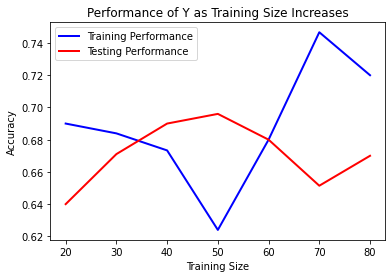

In [ ]:
# Experiment 3 -> Dataset 2 Logistical Regression

# 3 - Growing subsets of training data

trainingCost=[]
testingCost=[]

ts=0.2
for i in range(7):
  xTrain, xTest, yTrain, yTest = train_test_split(xTwo, yTwo["Class"], random_state = 104, test_size = ts, shuffle = True)

  #Y 
  LRG = LogisticRegression(verbose=True,sgd=True)
  yPredictions = LRG.fit(xTrain, yTrain).predict(xTrain)
  yTrainingWeights= LRG.w

  results=[]

  for i in yPredictions:
    if i <0.5:
      results.append(0)
    
    else:
      results.append(1)

  yTrain.to_numpy
  count= np.count_nonzero(np.array(results)==(yTrain))
  accuracyTrain = count/len(results)
  trainingCost.append(accuracyTrain)

  # Logistic Regression Performance on Test Set
  #Y 

  LRG = LogisticRegression(verbose=True,sgd=True)
  yPredictions = LRG.fit(xTrain, yTrain).predict(xTest)
  yTrainingWeights2= LRG.w

  results=[]

  for i in yPredictions:
    if i <0.5:
      results.append(0)
    
    else:
      results.append(1)

  yTrain.to_numpy
  a = np.count_nonzero(np.array(results)==(yTest))
  accuracyTest= a/len(results)
  testingCost.append(accuracyTest)



  ts+=0.1

print(trainingCost)
print(testingCost)

df=pd.DataFrame({'x_values': [20, 30, 40, 50, 60, 70, 80], 'Training Performance': trainingCost, 'Testing Performance': testingCost})
 
plt.plot( 'x_values', 'Training Performance', data=df, color='blue', linewidth=2)
plt.plot( 'x_values', 'Testing Performance', data=df, color='red', linewidth=2)
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Performance of Y as Training Size Increases")
plt.legend()

plt.show()


In [ ]:
#Experiment 4 (Task 3)

#LINEAR REGRESSION
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y["Y1"], random_state = 104, test_size = 0.20, shuffle = True)
rate=0.01
iters=1000
#Linear Regression Growing Mini-Batch Sizes
#Mini-Batch Size 8
LR = LinearRegression(sgd=True,lr=rate,batch_size=8,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd8=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Batch size: 8")

#Mini-Batch Size 16
LR = LinearRegression(sgd=True,lr=rate,batch_size=16,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd16=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Batch size: 16")

#Mini-Batch Size 32
LR = LinearRegression(sgd=True,lr=rate,batch_size=32,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd32=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Batch size: 32")

#Mini-Batch Size 64
LR = LinearRegression(sgd=True,lr=rate,batch_size=64,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd64=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Batch size: 64")

#Mini-Batch Size 128
LR = LinearRegression(sgd=True,lr=rate,batch_size=128,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd128=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Batch size: 128")

#Fully Batched (X1_train shape[0 right])
LR = LinearRegression(sgd=True,lr=rate,batch_size=X1_train.shape[0],max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_trainFull=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Fully-batched")

plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Convergence speed on different batch sizes for Linear Regression")
plt.legend()

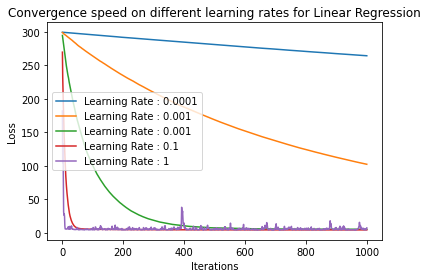

In [ ]:
bs=32
iters=1000

#Learning Rate : 0.0001
LR = LinearRegression(sgd=True,lr=0.0001,batch_size=bs,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd16=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Learning Rate : 0.0001")

#Learning Rate : 0.001
LR = LinearRegression(sgd=True,lr=0.001,batch_size=bs,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd32=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Learning Rate : 0.001")

#Learning Rate : 0.01
LR = LinearRegression(sgd=True,lr=0.01,batch_size=bs,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd64=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Learning Rate : 0.001")

#Learning Rate : 0.1
LR = LinearRegression(sgd=True,lr=0.1,batch_size=bs,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd128=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Learning Rate : 0.1")

#Learning Rate : 1
LR = LinearRegression(sgd=True,lr=1,batch_size=bs,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_trainFull=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Learning Rate : 1")

plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Convergence speed on different learning rates for Linear Regression")
plt.legend()

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(xTwo, yTwo["Class"], random_state = 104, test_size = 0.20, shuffle = True)

In [ ]:
#LOGISTIC REGRESSION
rate=0.001
iters=100000
#Linear Regression Growing Mini-Batch Sizes
#Mini-Batch Size 8
LR = LogisticRegression(sgd=True,learning_rate=rate,batch_size=8,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd8=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Batch size: 8")

#Mini-Batch Size 16
LR = LogisticRegression(sgd=True,learning_rate=rate,batch_size=16,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd16=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Batch size: 16")

#Mini-Batch Size 32
LR = LogisticRegression(sgd=True,learning_rate=rate,batch_size=32,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd32=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Batch size: 32")

#Mini-Batch Size 64
LR = LogisticRegression(sgd=True,learning_rate=rate,batch_size=64,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd64=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Batch size: 64")

#Mini-Batch Size 128
LR = LogisticRegression(sgd=True,learning_rate=rate,batch_size=128,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd128=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Batch size: 128")

#Fully Batched (X1_train shape[0 right])
LR = LogisticRegression(sgd=True,learning_rate=rate,batch_size=X1_train.shape[0],max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_trainFull=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Fully-batched")

plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Convergence speed on different batch sizes for Logistic Regression")
plt.legend()

KeyboardInterrupt: ignored

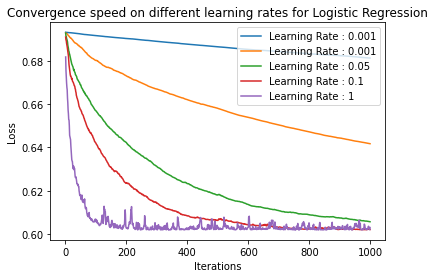

In [ ]:
bs=32
iters=1000



#Learning Rate : 0.001
LR = LogisticRegression(sgd=True,learning_rate=0.001,batch_size=bs,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd32=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Learning Rate : 0.001")

#Learning Rate : 0.01
LR = LogisticRegression(sgd=True,learning_rate=0.01,batch_size=bs,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd64=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Learning Rate : 0.001")

#Learning Rate : 0.05
LR = LogisticRegression(sgd=True,learning_rate=0.05,batch_size=bs,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd16=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Learning Rate : 0.05")

#Learning Rate : 0.1
LR = LogisticRegression(sgd=True,learning_rate=0.1,batch_size=bs,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd128=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Learning Rate : 0.1")

#Learning Rate : 1
LR = LogisticRegression(sgd=True,learning_rate=0.5,batch_size=bs,max_iters=iters)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_trainFull=np.mean((y1_predictions-y1_test)**2)
plt.plot(LR.record[0],LR.record[1],label="Learning Rate : 1")

plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Convergence speed on different learning rates for Logistic Regression")
plt.legend()

In [ ]:
#Performance of as batch size grows compared to the baseline of FullBatch
#Performance of Y1
df=pd.DataFrame({'x_values': [8, 16, 32, 64, 128], 'Training Performance': [MSE_y1_train_sgd8, MSE_y1_train_sgd16, MSE_y1_train_sgd32, MSE_y1_train_sgd64, MSE_y1_train_sgd128], 'FullBatch Performance': [MSE_y1_trainFull, MSE_y1_trainFull, MSE_y1_trainFull, MSE_y1_trainFull, MSE_y1_trainFull]})
 
plt.plot( 'x_values', 'Training Performance', data=df, color='blue', linewidth=2)
plt.plot( 'x_values', 'FullBatch Performance', data=df, color='red', linewidth=2)
plt.xlabel("Mini-Batch Size")
plt.ylabel("Mean Squared Error")
plt.title("Performance of Y1 as MiniBatch Size Increases")
plt.legend()

plt.show()

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y["Y2"], random_state = 104, test_size = 0.20, shuffle = True)

#Linear Regression Growing Mini-Batch Sizes
#Mini-Batch Size 8
LR = LinearRegression(sgd=True,lr=rate,batch_size=8,max_iters=iters)
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_train_sgd8=np.mean((y2_predictions-y2_test)**2)

#Mini-Batch Size 16
LR = LinearRegression(sgd=True,lr=rate,batch_size=16,max_iters=iters)
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_train_sgd16=np.mean((y2_predictions-y2_test)**2)

#Mini-Batch Size 32
LR = LinearRegression(sgd=True,lr=rate,batch_size=32,max_iters=iters)
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_train_sgd32=np.mean((y2_predictions-y2_test)**2)

#Mini-Batch Size 64
LR = LinearRegression(sgd=True,lr=rate,batch_size=64,max_iters=iters)
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_train_sgd64=np.mean((y2_predictions-y2_test)**2)

#Mini-Batch Size 128
LR = LinearRegression(sgd=True,lr=rate,batch_size=128,max_iters=iters)
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_train_sgd128=np.mean((y2_predictions-y2_test)**2)

#Fully Batched (X1_train shape[0 right])
LR = LinearRegression(sgd=True,lr=rate,batch_size=X2_train.shape[0],max_iters=iters)
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_trainFull=np.mean((y2_predictions-y2_test)**2)

#Performance of as batch size grows compared to the baseline of 
#Performance of Y2
df=pd.DataFrame({'x_values': [8, 16, 32, 64, 128], 'Training Performance': [MSE_y2_train_sgd8, MSE_y2_train_sgd16, MSE_y2_train_sgd32, MSE_y2_train_sgd64, MSE_y2_train_sgd128], 'FullBatch Performance': [MSE_y2_trainFull, MSE_y2_trainFull, MSE_y2_trainFull, MSE_y2_trainFull, MSE_y2_trainFull]})
 
plt.plot( 'x_values', 'Training Performance', data=df, color='blue', linewidth=2)
plt.plot( 'x_values', 'FullBatch Performance', data=df, color='red', linewidth=2)
plt.xlabel("Mini-Batch Size")
plt.ylabel("Mean Squared Error")
plt.title("Performance of Y2 as MiniBatch Size Increases")
plt.legend()

plt.show()

In [ ]:
#Experiment 5 (Task 3)
#Different Learning Rates for Linear Regression with Mini-Batch size as 16

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y["Y1"], random_state = 104, test_size = 0.20, shuffle = True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y["Y2"], random_state = 104, test_size = 0.20, shuffle = True)

#lr is 1
LR = LinearRegression(sgd=True,lr=1,batch_size=16,max_iters=10000)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd1=np.mean((y1_predictions-y1_test)**2)

#lr is 0.1
LR = LinearRegression(sgd=True,lr=0.1,batch_size=16,max_iters=10000)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd01=np.mean((y1_predictions-y1_test)**2)

#lr is 0.01
LR = LinearRegression(sgd=True,lr=0.01,batch_size=16,max_iters=10000)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd001=np.mean((y1_predictions-y1_test)**2)

#lr is 0.001
LR = LinearRegression(sgd=True,lr=0.001,batch_size=16,max_iters=10000)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_train_sgd0001=np.mean((y1_predictions-y1_test)**2)

#Performance of LinearRegression as learning rate changes
#Performance of Y1
df=pd.DataFrame({'x_values': [0.001, 0.01, 0.1, 1], 'Training Performance': [MSE_y1_train_sgd0001, MSE_y1_train_sgd001, MSE_y1_train_sgd01, MSE_y1_train_sgd1]})
 
plt.plot( 'x_values', 'Training Performance', data=df, color='blue', linewidth=2)
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.title("Performance of Y1 as Learning Rate Changes")
plt.legend()

plt.show()

In [ ]:
#lr is 1
LR = LinearRegression(sgd=True,lr=1,batch_size=16,max_iters=10000)
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_train_sgd1=np.mean((y2_predictions-y2_test)**2)

#lr is 0.1
LR = LinearRegression(sgd=True,lr=0.1,batch_size=16,max_iters=10000)
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_train_sgd01=np.mean((y2_predictions-y2_test)**2)

#lr is 0.01
LR = LinearRegression(sgd=True,lr=0.01,batch_size=16,max_iters=10000)
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_train_sgd001=np.mean((y2_predictions-y2_test)**2)

#lr is 0.001
LR = LinearRegression(sgd=True,lr=0.001,batch_size=16,max_iters=10000)
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_train_sgd0001=np.mean((y2_predictions-y2_test)**2)

#Performance of LinearRegression as learning rate changes
#Performance of Y2
df=pd.DataFrame({'x_values': [0.001, 0.01, 0.1, 1], 'Training Performance': [MSE_y2_train_sgd0001, MSE_y2_train_sgd001, MSE_y2_train_sgd01, MSE_y2_train_sgd1]})
 
plt.plot( 'x_values', 'Training Performance', data=df, color='blue', linewidth=2)
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.title("Performance of Y2 as Learning Rate Changes")
plt.legend()

plt.show()

In [ ]:
# Various Learning rates -> Experiment 5
# Logistic Regression Performance on Training Set
#Y 
xTrain, xTest, yTrain, yTest = train_test_split(xTwo, yTwo["Class"], random_state = 104, test_size = 0.2, shuffle = True)
trainingValues=[]
testingValues=[]
# Default learning rate, 0.1

LRG = LogisticRegression(verbose=True,sgd=True, learning_rate=.1)
yPredictions = LRG.fit(xTrain, yTrain).predict(xTrain)
yTrainingWeights= LRG.w

results=[]

for i in yPredictions:
  if i <0.5:
    results.append(0)
    
  else:
    results.append(1)

yTrain.to_numpy
count= np.count_nonzero(np.array(results)==(yTrain))
accuracyTrain = count/len(results)

# Logistic Regression Performance on Test Set 0.1
#Y 
xTrain, xTest, yTrain, yTest = train_test_split(xTwo, yTwo["Class"], random_state = 104, test_size = 0.2, shuffle = True)
LRG = LogisticRegression(verbose=True,sgd=True, learning_rate=.1)
yPredictions = LRG.fit(xTrain, yTrain).predict(xTest)
yTrainingWeights2= LRG.w

results=[]

for i in yPredictions:
  if i <0.5:
    results.append(0)
    
  else:
    results.append(1)

yTrain.to_numpy
count= np.count_nonzero(np.array(results)==(yTest))
accuracyTest = count/len(results)

print(accuracyTrain)
trainingValues.append(accuracyTran)
print(accuracyTest)
testingValues.append(accuracyTest)

#Rate = 0.5
xTrain, xTest, yTrain, yTest = train_test_split(xTwo, yTwo["Class"], random_state = 104, test_size = 0.2, shuffle = True)

LRG = LogisticRegression(verbose=True,sgd=True, learning_rate=.5)
yPredictions = LRG.fit(xTrain, yTrain).predict(xTrain)
yTrainingWeights= LRG.w

results=[]

for i in yPredictions:
  if i <0.5:
    results.append(0)
    
  else:
    results.append(1)

yTrain.to_numpy
count= np.count_nonzero(np.array(results)==(yTrain))
accuracyTrain = count/len(results)


# Logistic Regression Performance on Test Set 0.5
#Y 
xTrain, xTest, yTrain, yTest = train_test_split(xTwo, yTwo["Class"], random_state = 104, test_size = 0.2, shuffle = True)
LRG = LogisticRegression(verbose=True,sgd=True, learning_rate=.5)
yPredictions = LRG.fit(xTrain, yTrain).predict(xTest)
yTrainingWeights2= LRG.w

results=[]

for i in yPredictions:
  if i <0.5:
    results.append(0)
    
  else:
    results.append(1)

yTrain.to_numpy
count= np.count_nonzero(np.array(results)==(yTest))
accuracyTest = count/len(results)

print(accuracyTrain)
trainingValues.append(accuracyTran)
print(accuracyTest)
testingValues.append(accuracyTest)

# Learning rate = 0.9
xTrain, xTest, yTrain, yTest = train_test_split(xTwo, yTwo["Class"], random_state = 104, test_size = 0.2, shuffle = True)
LRG = LogisticRegression(verbose=True,sgd=True, learning_rate=12)
yPredictions = LRG.fit(xTrain, yTrain).predict(xTrain)
yTrainingWeights= LRG.w

results=[]

for i in yPredictions:
  if i <0.5:
    results.append(0)
    
  else:
    results.append(1)

yTrain.to_numpy
count= np.count_nonzero(np.array(results)==(yTrain))
accuracyTrain = count/len(results)



# Logistic Regression Performance on Test Set 0.9
#Y 
xTrain, xTest, yTrain, yTest = train_test_split(xTwo, yTwo["Class"], random_state = 104, test_size = 0.2, shuffle = True)
LRG = LogisticRegression(verbose=True,sgd=True, learning_rate=12)
yPredictions = LRG.fit(xTrain, yTrain).predict(xTest)
yTrainingWeights2= LRG.w

results=[]

for i in yPredictions:
  if i <0.5:
    results.append(0)
    
  else:
    results.append(1)

yTrain.to_numpy
count= np.count_nonzero(np.array(results)==(yTest))
accuracyTest = count/len(results)

print(accuracyTrain)
trainingValues.append(accuracyTrain)
print(accuracyTest)
testingValues.append(accuracyTest)


print("The performance for the training set is as follows: " )
print(trainingValues)
print("The performance for the testing set is as follows: " )
print(testingValues)




0.69
0.68
0.69
0.64
0.545
0.68


In [ ]:
#Experiment 6 (Task 3)

#STOCHASTIC GRADIENT DESCENT
LR = LinearRegression(sgd=True,lr=0.005,batch_size=10,max_iters=10000)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)
y1sgd_weights = LR.w
MSE_y1_train_sgd=np.mean((y1_predictions-y1_train)**2)
print("MINI-BATCH WEIGHTS:",LR.w)

LR = LinearRegression(sgd=True,lr=0.005,batch_size=10,max_iters=10000)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_test_sgd=np.mean((y1_predictions-y1_test)**2)

LR = LinearRegression(sgd=True,lr=0.005,batch_size=10,max_iters=10000)
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_test_sgd=np.mean((y2_predictions-y2_test)**2)


#ANALYTICAL SOLUTION
LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)
y1_weights = LR.w
MSE_y1_train_an=np.mean((y1_predictions-y1_train)**2)
print("ANALYTICAL SOLUTION:",LR.w)

LR = LinearRegression()
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_test)
MSE_y1_test_an=np.mean((y1_predictions-y1_test)**2)

LR = LinearRegression()
y2_predictions = LR.fit(X2_train, y2_train).predict(X2_test)
MSE_y2_test_an=np.mean((y2_predictions-y2_test)**2)

In [ ]:
#EXPERIMENT 6 GRAPH
SGD=[MSE_y1_test_sgd,MSE_y2_test_sgd]
ANALYTICAL=[MSE_y1_test_an,MSE_y2_test_an]
x = np.arange(2)

width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, SGD, width)
plt.bar(x+0.2, ANALYTICAL, width)
plt.xticks(x,["Y1","Y2"])
plt.ylabel("Mean squarer error")
plt.legend(["Mini-batch SGD","Analytical solution"])
plt.show()


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y["Class"], random_state = 104, test_size = 0.20, shuffle = True)

In [ ]:
LR = LogisticRegression(verbose=True,sgd=True)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)
LR.w

In [ ]:
LR = LogisticRegression(verbose=True)
y1_predictions = LR.fit(X1_train, y1_train).predict(X1_train)